# Algoritmo con redes neuronales 

## 1. Análisis de datos

In [2]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [3]:
#leectura de datos
df = pd.read_excel('Clasificacion.xlsx')

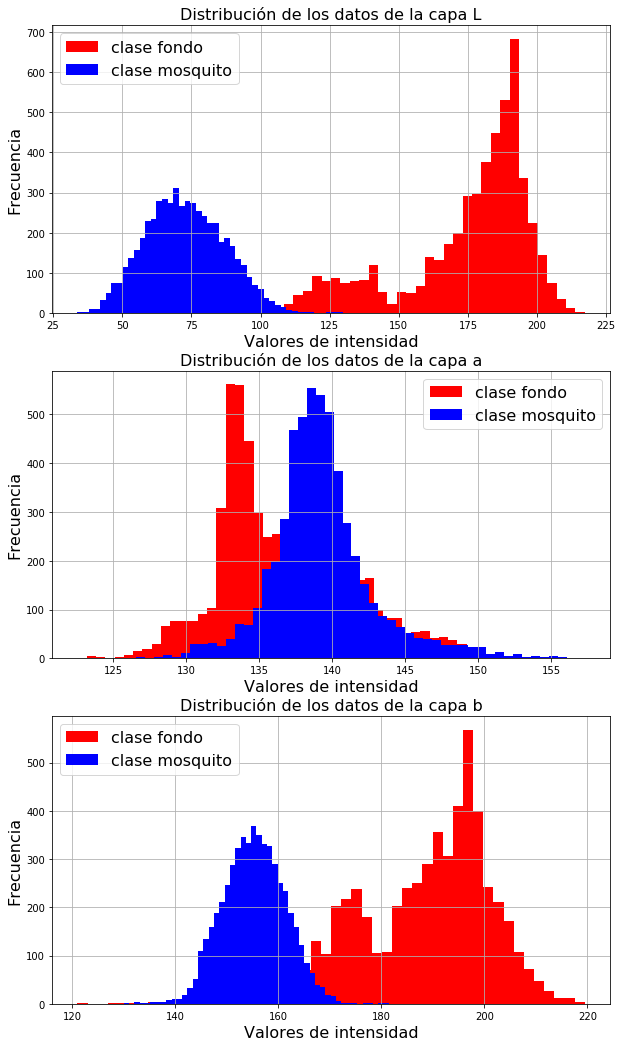

In [44]:
#Imprimir datos de acuerdo a la clasificación
L, a, b, y_esperada = df["L"].values, df["A"].values, df["B"].values, df["Clase"].values
y_esperada[y_esperada == 0] = -1
inx = np.where(y_esperada == -1)
x1_rojo, x2_rojo, x3_rojo = L[inx[0][0]:], b[inx[0][0]:], a[inx[0][0]:] 
x1_azul, x2_azul, x3_azul = L[:inx[0][0]], b[:inx[0][0]], a[:inx[0][0]]

plt.figure(1, figsize=(10,18))
plt.subplot(3,1,1)

plt.hist(x1_rojo, 50, facecolor= 'r', label='clase fondo')
plt.hist(x1_azul, 50, facecolor= 'b', label='clase mosquito')
plt.legend(loc='best', fontsize=16)
plt.title("Distribución de los datos de la capa L", fontsize=16)
plt.xlabel("Valores de intensidad", fontsize=16)
plt.ylabel("Frecuencia", fontsize=16)
plt.grid()


plt.subplot(3,1,2)

plt.hist(x3_rojo, 50, facecolor= 'r', label='clase fondo')
plt.hist(x3_azul, 50, facecolor= 'b', label='clase mosquito')
plt.legend(loc='best', fontsize=16)
plt.title("Distribución de los datos de la capa a", fontsize=16)
plt.xlabel("Valores de intensidad", fontsize=16)
plt.ylabel("Frecuencia", fontsize=16)
plt.grid()

plt.subplot(3,1,3)

plt.hist(x2_rojo, 50, facecolor= 'r', label='clase fondo')
plt.hist(x2_azul, 50, facecolor= 'b', label='clase mosquito')
plt.legend(loc='best', fontsize=16)
plt.title("Distribución de los datos de la capa b", fontsize=16)
plt.xlabel("Valores de intensidad", fontsize=16)
plt.ylabel("Frecuencia", fontsize=16)
plt.grid()
plt.show()

## 2. Algoritmo de entrenamiento LMS

In [32]:
#Condiciones iniciales
Error_min = 0.26 #float(input("Error máximo permitido: "))
paso = 1e-6 #float(input("Ingrese el paso a entrenar la red:"))
X = np.transpose(np.array([L, b, np.ones_like(L)]))
Y = y_esperada
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

W_prev = np.random.rand(1, 2)
W_prev = np.append(W_prev,0)                  #Agregando el bais
W_prev = np.reshape(W_prev,(3,1))
ite_max = 0
W = 0
Error_train = []
Error_test = []
Error_global_test = Error_min + 1
Error_global_train = Error_min + 1
Error = Error_min + 1

In [33]:
while ( ite_max < 5000):
    i = np.random.randint(0, X_train.shape[0], 1)
    X_i = X_train[i,:]
    Y_i = Y_train[i]
    g = np.dot(X_i, W_prev)
    e = g - Y_i
    W_next = W_prev - paso*e*np.transpose(X_i)
    W_prev = W_next
    #Calculo del error global (condición para finalizar el ciclo)
    #--------- Error global Train ----------
    Y_actual_train = np.dot(X_train, W_prev)
    Y_actual_train[Y_actual_train >= 0] = 1
    Y_actual_train[Y_actual_train < 0] = -1
    
    
    Error_global_train = 1/Y_actual_train.shape[0]*np.sum(abs(Y_actual_train - Y_train.reshape(X_train.shape[0],1))/2)
    Error_train.append(Error_global_train)
    
    #-------- Error global test ---------
    Y_actual_test = np.dot(X_test, W_prev)
    Y_actual_test[Y_actual_test >= 0] = 1
    Y_actual_test[Y_actual_test < 0] = -1
    
    
    Error_global_test = 1/Y_actual_test.shape[0]*np.sum(abs(Y_actual_test - Y_test.reshape(X_test.shape[0],1))/2)
    Error_test.append(Error_global_test)
    
    if Error > Error_global_test:
        W = W_prev
    
    ite_max += 1


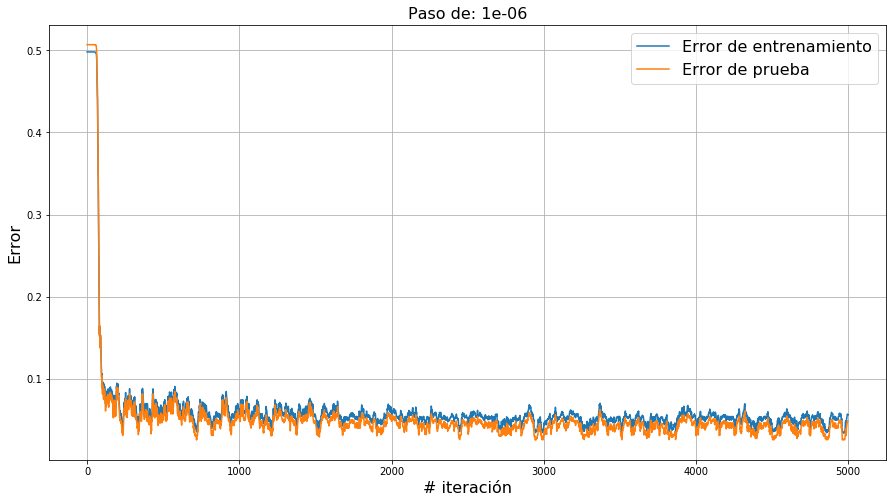

In [34]:
plt.figure(2, figsize=(15,8))
plt.plot(Error_train, label="Error de entrenamiento")
plt.plot(Error_test, label="Error de prueba")
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.xlabel("# iteración",fontsize=16)
plt.ylabel("Error", fontsize=16)
plt.title("Paso de: {}" .format(paso), fontsize=16)
plt.show()

In [35]:
print('Error de train ' + str(Error_train[np.argmin(Error_test)]) + ' en la iteración ' + str(np.argmin(Error_test)))
print('Error minimo de test ' + str(min(Error_test)) + ' en la iteración ' + str(np.argmin(Error_test)))
print('Con los siguentes pesos W: ' + str(W) )

Error de train 0.03431429568454112 en la iteración 2945
Error minimo de test 0.025116279069767444 en la iteración 2945
Con los siguentes pesos W: [[-0.02137607]
 [ 0.01552042]
 [-0.00251229]]


## 3. Algoritmo de entrenamiento perceptrón

In [36]:
#Condiciones iniciales
Error_min = 0.1 #float(input("Error máximo permitido: "))
X = np.transpose(np.array([L, b, np.ones_like(L)]))
Y = y_esperada
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#--------Inicialización de parametros del algoritmo -----------
W_prev = np.random.rand(1, 2)
W_prev = np.append(W_prev,0)                  #Agregando el bais
W_prev = np.reshape(W_prev,(3,1))
ite_max = 0
t = 0
t_max = 0
W_bolsillo = 0
W = 0

#------- Inicialización de parametros de error---------
Error_train = []
Error_test = []
Error_global_test = 0
Error_global_train = Error_min + 1
Error = Error_min + 1

In [37]:
while ( ite_max < 100 ):
    i = np.random.randint(0, X_train.shape[0], 1)
    X_i = X_train[i,:]
    Y_i = Y_train[i]
    g = np.dot(X_i, W_prev) * Y_i
    if g > 0:
        t += 1                      #Se tiene un acierto
        if t > t_max:
            t_max = t
            W_bolsillo = W_prev
    else:
        W_next = W_prev + np.transpose(X_i*Y_i)
        t = 0
        W_prev = W_next
    
    #Calculo del error global (condición para finalizar el ciclo)
    #--------- Error global Train ----------
    Y_actual_train = np.dot(X_train, W_prev)
    Y_actual_train[Y_actual_train >= 0] = 1
    Y_actual_train[Y_actual_train < 0] = -1
    
    
    Error_global_train = 1/Y_actual_train.shape[0]*np.sum(abs(Y_actual_train - Y_train.reshape(X_train.shape[0],1))/2)
    Error_train.append(Error_global_train)
    
    #-------- Error global test ---------
    Y_actual_test = np.dot(X_test, W_prev)
    Y_actual_test[Y_actual_test >= 0] = 1
    Y_actual_test[Y_actual_test < 0] = -1
    

    Error_global_test = 1/Y_actual_test.shape[0]*np.sum(abs(Y_actual_test - Y_test.reshape(X_test.shape[0],1))/2)
    Error_test.append(Error_global_test)
    
    if Error > Error_global_test:
        W = W_prev
    
    ite_max += 1
        
    

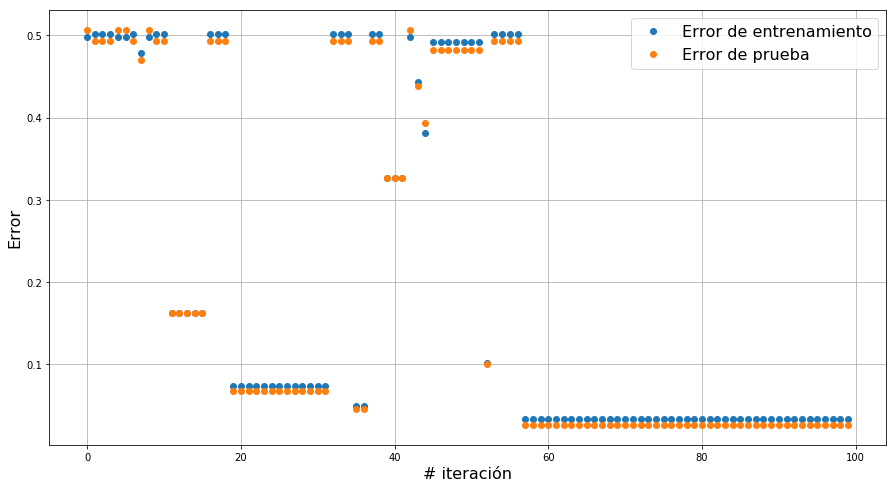

In [38]:
plt.figure(3, figsize=(15,8))
plt.plot(Error_train, "o", label="Error de entrenamiento")
plt.plot(Error_test, "o" , label="Error de prueba")
plt.legend(loc='best',fontsize=16)
plt.grid()
plt.xlabel("# iteración",fontsize=16)
plt.ylabel("Error",fontsize=16)
plt.show()

In [39]:
# Analisis de error de entrenamiento y error de prueba con el W_bolsillo
Y_actual_train = np.dot(X_train, W_bolsillo)
Y_actual_train[Y_actual_train >= 0] = 1
Y_actual_train[Y_actual_train < 0] = -1

Error_global_train = 1/Y_actual_train.shape[0]*np.sum(abs(Y_actual_train - Y_train.reshape(X_train.shape[0],1))/2)

#-------- Error global test ---------
Y_actual_test = np.dot(X_test, W_bolsillo)
Y_actual_test[Y_actual_test >= 0] = 1
Y_actual_test[Y_actual_test < 0] = -1

Error_global_test = 1/Y_actual_test.shape[0]*np.sum(abs(Y_actual_test - Y_test.reshape(X_test.shape[0],1))/2)

print('Error de train ' + str(Error_global_train) )
print('Error minimo de test ' + str(Error_global_test))
print('Con los siguentes pesos W: ' + str(W_bolsillo) )

Error de train 0.03373269745259975
Error minimo de test 0.026046511627906978
Con los siguentes pesos W: [[-382.37100332]
 [ 250.58722549]
 [   3.        ]]


## 4. Multicapa

In [40]:
X = np.transpose(np.array([L, b]))
Y = y_esperada
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

error_test = []
error_train = []
cont = 0
Error = 1
capas = [1, 1, 1]
for n_h1 in range(1, 100):
        nn=MLPClassifier(alpha=1e-05, hidden_layer_sizes=(n_h1), random_state=1, solver='sgd', activation='tanh', max_iter = 2500)
        nn.out_activation_ = 'tanh'
        nn.fit(X_train,Y_train)
        error_test.append(np.sum(abs(nn.predict(X_test) - Y_test)/2)/len(Y_test))
        error_train.append(np.sum(abs(nn.predict(X_train) - Y_train)/2)/len(Y_train))
        cont += 1
        if Error > error_test[-1]:
            capas[0] = n_h1 
            #capas[1] = n_h2
            #capas[1] = n_h3
            Error = error_test[-1]

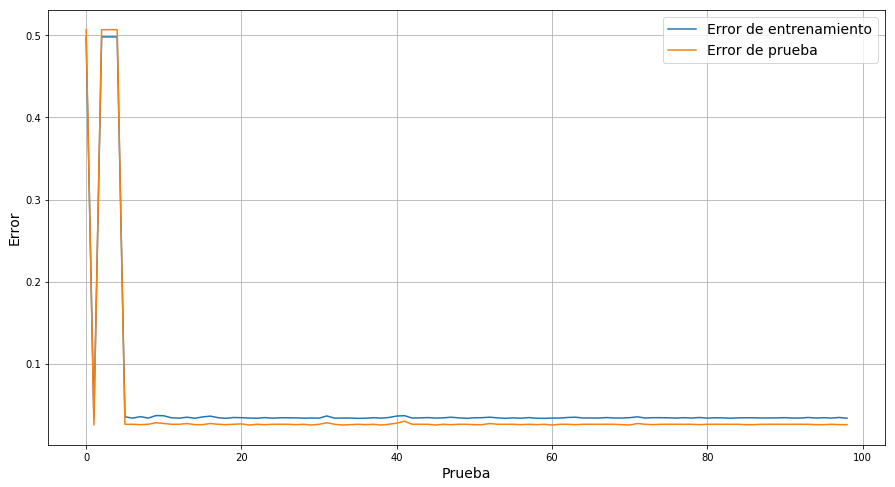

Error minimo train: 0.03361637780621147
Error minimo test: 0.025116279069767444
Con la arquitectrua [2, 1, 1]


In [41]:
plt.figure(figsize=(15,8))
plt.plot(error_train, label="Error de entrenamiento")
plt.plot(error_test, label="Error de prueba")
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.xlabel("Prueba",fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.show()

print("Error minimo train: " + str(error_train[np.argmin(error_test)]))
print("Error minimo test: " + str(min(error_test)))
print("Con la arquitectrua " + str(capas))